<a href="https://colab.research.google.com/github/mamiri6/SemEval2023Group2/blob/main/Amiri_ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies

In [3]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


nlp=spacy.load('en_core_web_sm')
pd.set_option('display.max_colwidth',1000)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


## Loading Data

In [8]:
train_file='../data/train_all_tasks.csv'
dev_file='../data/dev_task_a_entries.csv'
data=pd.read_csv(train_file)
data

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic virgins are the ones to turn a gay woman straight, lol",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I know there isn't enough money in the world to induce me to do an beastly female equivalent.,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
...,...,...,...,...,...
13995,sexism2022_english-14185,"complexes like the 'nice chicks' that go after bad boys Nah nah nah man This is what life is all about, making yourself into an animal and finding those nice girls with the daddy issues.",sexist,2. derogation,2.1 descriptive attacks
13996,sexism2022_english-18629,"""GRAPHIC Germany - Muslim ""refugee"" stabbing his younger 17yo sister "" by [USER] [URL]",not sexist,none,none
13997,sexism2022_english-3320,Lol I imagine there would be simps that are like “she doesn’t deserve an ugly guy” JFL.,not sexist,none,none
13998,sexism2022_english-13309,"It's not, the girls I go on dates with don't kiss me on the first date, and they don't text me back after the first date",not sexist,none,none


In [65]:
data.iloc[13995]

rewire_id                                                                                                                                                                           sexism2022_english-14185
text              complexes like the 'nice chicks' that go after bad boys Nah nah nah man This is what life is all about, making yourself into an animal and finding those nice girls with the daddy issues.
label_sexist                                                                                                                                                                                          sexist
label_category                                                                                                                                                                                 2. derogation
label_vector                                                                                                                                                                        

In [58]:
label_sexist=data['label_sexist'].unique()
label_sexist

array(['not sexist', 'sexist'], dtype=object)

In [59]:
label_category=data['label_category'].unique()
label_category

array(['none', '2. derogation',
       '1. threats, plans to harm and incitement', '3. animosity',
       '4. prejudiced discussions'], dtype=object)

In [60]:
label_vector=data['label_vector'].unique()
label_vector

array(['none', '2.3 dehumanising attacks & overt sexual objectification',
       '2.1 descriptive attacks',
       '1.2 incitement and encouragement of harm',
       '3.1 casual use of gendered slurs, profanities, and insults',
       '4.2 supporting systemic discrimination against women as a group',
       '2.2 aggressive and emotive attacks',
       '3.2 immutable gender differences and gender stereotypes',
       '3.4 condescending explanations or unwelcome advice',
       '3.3 backhanded gendered compliments',
       '4.1 supporting mistreatment of individual women',
       '1.1 threats of harm'], dtype=object)

In [6]:
sex=data.groupby('label_sexist')['text'].count()
sex

label_sexist
not sexist    10602
sexist         3398
Name: text, dtype: int64

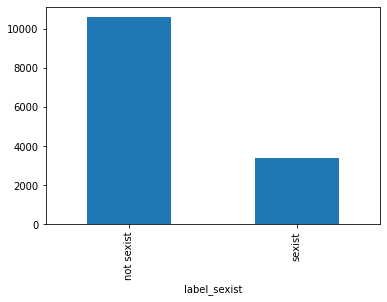

In [62]:
sex.plot(kind='bar')

In [12]:
data.groupby(by=['label_sexist'])['text'].count()

label_sexist
not sexist    10602
sexist         3398
Name: text, dtype: int64

## token analysis

In [182]:
stopwords=nlp.Defaults.stop_words
stopwords=stopwords.union(['.',',','\"','?','!','[',']','...','#','(',')','{','}','[USER]',';',':','[URL]','>','<'])
def getNumberOfTokens(text):
  doc=nlp(text)
  return sum([1 for t in doc])

def getNumberOfMeaningfulTokens(text):
  doc=nlp(text)
  return sum([1 for t in doc if str(t).strip() not in stopwords])
def getMeaningfulTokens(text):
  doc=nlp(text)
  return ([t.lemma_ for t in doc if str(t).strip() not in stopwords])  

In [149]:
#getNumberOfTokens('Damn, this writing was pretty chaotic')
getMeaningfulTokens('Damn, this sex sexy sexual bisexual was pretty chaotics')

['damn', 'sex', 'sexy', 'sexual', 'bisexual', 'pretty', 'chaotic']

In [139]:
#data['numTokens']=data['text'].apply(lambda x: getNumberOfTokens(x))
data['meaningfulTokens']=data['text'].apply(lambda x: getMeaningfulTokens(x))
data

,rewire_id,text,label_sexist,label_category,label_vector,numtokens,numTokens,numMeaningfulTokens,meaningfulTokens
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none,7,7,4,"[damn, writing, pretty, chaotic]"
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic virgins are the ones to turn a gay woman straight, lol",not sexist,none,none,20,20,11,"[yeah, apparently, bunch, misogynistic, virgin, one, turn, gay, woman, straight, lol]"
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none,15,15,4,"[how, fuck, woman, MP]"
3,sexism2022_english-14895,Understand. Know you're right. At same time I know there isn't enough money in the world to induce me to do an beastly female equivalent.,not sexist,none,none,30,30,13,"[understand, know, right, at, time, I, know, money, world, induce, beastly, female, equivalent]"
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none,9,9,4,"[surprized, stop, rape, woman]"
...,...,...,...,...,...,...,...,...,...
13995,sexism2022_english-14185,"complexes like the 'nice chicks' that go after bad boys Nah nah nah man This is what life is all about, making yourself into an animal and finding those nice girls with the daddy issues.",sexist,2. derogation,2.1 descriptive attacks,39,39,21,"[complex, like, ', nice, chick, ', bad, boy, Nah, nah, nah, man, this, life, make, animal, find, nice, girl, daddy, issue]"
13996,sexism2022_english-18629,"""GRAPHIC Germany - Muslim ""refugee"" stabbing his younger 17yo sister "" by [USER] [URL]",not sexist,none,none,21,21,11,"[GRAPHIC, Germany, -, Muslim, refugee, stab, young, 17yo, sister, user, url]"
13997,sexism2022_english-3320,Lol I imagine there would be simps that are like “she doesn’t deserve an ugly guy” JFL.,not sexist,none,none,21,21,11,"[lol, I, imagine, simp, like, "", deserve, ugly, guy, "", JFL]"
13998,sexism2022_english-13309,"It's not, the girls I go on dates with don't kiss me on the first date, and they don't text me back after the first date",not sexist,none,none,31,31,8,"[it, girl, I, date, kiss, date, text, date]"


In [207]:
data.describe()

,numtokens,numTokens,numMeaningfulTokens,maleCount,womenCount,generalCount,prfanity_presence
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,10602.000000
mean,28.157714,28.157714,13.420429,0.199143,0.523214,0.277786,0.177231
std,13.856684,13.856684,6.861489,0.499073,0.664664,0.584749,0.381882
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,27.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,39.000000,18.000000,0.000000,1.000000,0.000000,0.000000
max,86.000000,86.000000,60.000000,5.000000,5.000000,6.000000,1.000000


In [122]:
data.groupby('label_sexist')['numMeaningfulTokens'].mean()

label_sexist
not sexist    13.261743
sexist        13.915539
Name: numMeaningfulTokens, dtype: float64

In [123]:
data.groupby('label_sexist')['numTokens'].mean()

label_sexist
not sexist    27.687229
sexist        29.625662
Name: numTokens, dtype: float64

In [67]:
data[data['numTokens']!=data['numMeaningfulTokens']]

,rewire_id,text,label_sexist,label_category,label_vector,numtokens,numTokens,numMeaningfulTokens


In [ ]:
data.drop(labels=['numtokens'],axis=1)

In [ ]:
data[data['label_sexist']==label_sexist[1]].head(50)

### Frequent Words

In [ ]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(data[data['label_sexist']==label_sexist[0]]['text'])
feature_set=vectorizer.get_feature_names_out()
feature_set
wordCouns=x.sum(axis=0)
words_freq = [(word, wordCouns[0, idx]) for word, idx in vectorizer.vocabulary_.items() if word not in stopwords]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq.take(20)

In [214]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(data[data['label_sexist']==label_sexist[1]]['text'])
feature_set=vectorizer.get_feature_names_out()
feature_set
wordCouns=x.sum(axis=0)


In [215]:
words_freq = [(word, wordCouns[0, idx]) for word, idx in vectorizer.vocabulary_.items() if word not in stopwords]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('women', 1356),
 ('men', 503),
 ('like', 480),
 ('bitch', 409),
 ('woman', 377),
 ('don', 346),
 ('female', 231),
 ('man', 227),
 ('fuck', 226),
 ('url', 208),
 ('shit', 205),
 ('want', 199),
 ('fucking', 192),
 ('girls', 179),
 ('know', 169),
 ('pussy', 163),
 ('user', 157),
 ('good', 154),
 ('white', 152),
 ('girl', 148),
 ('think', 143),
 ('sex', 143),
 ('whore', 141),
 ('time', 135),
 ('way', 127),
 ('cunt', 123),
 ('people', 117),
 ('right', 114),
 ('rape', 103),
 ('ll', 102),
 ('need', 99),
 ('life', 95),
 ('guy', 95),
 ('thing', 93),
 ('look', 91),
 ('better', 89),
 ('stupid', 89),
 ('got', 89),
 ('money', 88),
 ('male', 88),
 ('guys', 88),
 ('lol', 87),
 ('ve', 87),
 ('hate', 86),
 ('ass', 83),
 ('wife', 81),
 ('bitches', 80),
 ('doesn', 80),
 ('love', 80),
 ('going', 79),
 ('slut', 79),
 ('ugly', 76),
 ('chad', 73),
 ('fat', 71),
 ('let', 69),
 ('real', 69),
 ('probably', 68),
 ('true', 68),
 ('work', 68),
 ('day', 67),
 ('old', 64),
 ('little', 62),
 ('years', 62),
 ('yeah'

In [183]:
vectorizer=TfidfVectorizer()
y=vectorizer.fit_transform(data['text'])
feature_set2=vectorizer.get_feature_names_out()
feature_set2

array(['00', '000', '0009', ..., '𝐭𝐡𝐞', '𝐯𝐞', '𝐰𝐚𝐢𝐭𝐢𝐧𝐠'], dtype=object)

In [184]:
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
len(feature_set)

20964

In [81]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Analysis

In [191]:
maleWords=['man','men','guy','male','gay']
womenWords=['woman','women','female','girl','wife','lady']
generalWords=['inside','pussy','fuck','fucking','f_ck','bitch','SON','sex','sexual','chick','xxx','sexxy','penetrate','shit','fuckoff','tits','tit','femoid','ass']
AllWords=maleWords+womenWords+generalWords
AllWords

['man',
 'men',
 'guy',
 'male',
 'gay',
 'woman',
 'women',
 'female',
 'girl',
 'wife',
 'lady',
 'inside',
 'pussy',
 'fuck',
 'fucking',
 'f_ck',
 'bitch',
 'SON',
 'sex',
 'sexual',
 'chick',
 'xxx',
 'sexxy',
 'penetrate',
 'shit',
 'fuckoff',
 'tits',
 'tit',
 'femoid',
 'ass']

In [ ]:
#s=['this', 'is' ,'a' ,'bitch']
#d=s.apply(lambda x: sum([1 for t in x if t in AllWords]))
#d
data['maleCount']=data['meaningfulTokens'].apply(lambda x: sum([1 for t in x if t in maleWords]))
data['womenCount']=data['meaningfulTokens'].apply(lambda x: sum([1 for t in x if t in womenWords]))
data['generalCount']=data['meaningfulTokens'].apply(lambda x: sum([1 for t in x if t in generalWords]))
data.head(30)

In [159]:
data.shape


(14000, 12)

In [ ]:
data.head(30)

In [ ]:
data[data['label_sexist']==label_sexist[1]]

In [194]:
data[['label_sexist','maleCount','womenCount','generalCount']].groupby('label_sexist')['maleCount'].mean()

label_sexist
not sexist    0.167044
sexist        0.299294
Name: maleCount, dtype: float64

In [195]:
non_sexism=data[data['label_sexist']==label_sexist[0]]
sexism=data[data['label_sexist']==label_sexist[1]]


In [196]:
non_sexism.describe()


,numtokens,numTokens,numMeaningfulTokens,maleCount,womenCount,generalCount
count,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000,10602.000000
mean,27.687229,27.687229,13.261743,0.167044,0.457650,0.211187
std,13.885679,13.885679,6.940763,0.455258,0.626543,0.500557
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,16.000000,8.000000,0.000000,0.000000,0.000000
50%,26.000000,26.000000,12.000000,0.000000,0.000000,0.000000
75%,39.000000,39.000000,18.000000,0.000000,1.000000,0.000000
max,85.000000,85.000000,60.000000,5.000000,5.000000,5.000000


In [197]:
sexism.describe()

,numtokens,numTokens,numMeaningfulTokens,maleCount,womenCount,generalCount
count,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000
mean,29.625662,29.625662,13.915539,0.299294,0.727781,0.485580
std,13.664100,13.664100,6.584492,0.605300,0.735011,0.755082
min,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18.000000,18.000000,9.000000,0.000000,0.000000,0.000000
50%,29.000000,29.000000,13.000000,0.000000,1.000000,0.000000
75%,40.750000,40.750000,19.000000,0.000000,1.000000,1.000000
max,86.000000,86.000000,49.000000,5.000000,5.000000,6.000000


In [198]:
data.head(3)

,rewire_id,text,label_sexist,label_category,label_vector,numtokens,numTokens,numMeaningfulTokens,meaningfulTokens,maleCount,womenCount,generalCount
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none,7,7,4,"[damn, writing, pretty, chaotic]",0,0,0
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic virgins are the ones to turn a gay woman straight, lol",not sexist,none,none,20,20,11,"[yeah, apparently, bunch, misogynistic, virgin, one, turn, gay, woman, straight, lol]",1,1,0
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none,15,15,4,"[how, fuck, woman, MP]",0,1,1


In [178]:
s=''
for index,row in enumerate(data['text']):
  s+=row
print(s)  
  #s+=row['text']

Damn, this writing was pretty chaoticYeah, and apparently a bunch of misogynistic virgins are the ones to turn a gay woman straight, lolHow the FUCK is this woman still an MP!!!???Understand. Know you're right. At same time I know there isn't enough money in the world to induce me to do an beastly female equivalent.Surprized they didn't stop and rape some womenyeah but in order to keep the benefit i have to be good tommorow because i told her we could tryHahaha I just wish they would live their truth and cut the shit, so we wouldn't have to worry about these mfs being out in society.head mod said she talked to him after he made his post and she won’t tell anyone what they talked about because as she says it’s “classified” and she was the only one not freaking out unlike the other modsjust the inside of your wallet: cash, bank cards, credit cards, debit cards. That is the inside that matters to femoids.We most definitely did. I didn’t go too much into the details of what happened, but s

In [208]:
def checkProfanityPresence(text):

  return True if sum([1 for t in text if t in generalWords])>0 else False

In [209]:
data['prfanity_presence']=data[data['label_sexist']==label_sexist[0]]['meaningfulTokens'].apply(lambda x: checkProfanityPresence(x))

In [210]:
data.head(4)

,rewire_id,text,label_sexist,label_category,label_vector,numtokens,numTokens,numMeaningfulTokens,meaningfulTokens,maleCount,womenCount,generalCount,prfanity_presence
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none,7,7,4,"[damn, writing, pretty, chaotic]",0,0,0,False
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic virgins are the ones to turn a gay woman straight, lol",not sexist,none,none,20,20,11,"[yeah, apparently, bunch, misogynistic, virgin, one, turn, gay, woman, straight, lol]",1,1,0,False
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none,15,15,4,"[how, fuck, woman, MP]",0,1,1,True
3,sexism2022_english-14895,Understand. Know you're right. At same time I know there isn't enough money in the world to induce me to do an beastly female equivalent.,not sexist,none,none,30,30,13,"[understand, know, right, at, time, I, know, money, world, induce, beastly, female, equivalent]",0,1,0,False


In [211]:
data['not sexist']

,numtokens,numTokens,numMeaningfulTokens,maleCount,womenCount,generalCount
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,28.157714,28.157714,13.420429,0.199143,0.523214,0.277786
std,13.856684,13.856684,6.861489,0.499073,0.664664,0.584749
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,17.000000,8.000000,0.000000,0.000000,0.000000
50%,27.000000,27.000000,13.000000,0.000000,0.000000,0.000000
75%,39.000000,39.000000,18.000000,0.000000,1.000000,0.000000
max,86.000000,86.000000,60.000000,5.000000,5.000000,6.000000


In [ ]:
"""pipeline(',askedLM','roberta')
pipe("yhis is <mask>")


pipeline feature extraction
simple transformers"""